In [ ]:
#Importibg libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM 
from keras.layers import Dense

In [ ]:
#importing drive
from google.colab import drive


In [ ]:
#mounting drivw
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#importing the dataset
df=pd.read_csv('gdrive/My Drive/project/baldwin_pump_data.csv')
df

,Timestamp,BFP_SEAL_WATER_FLOW,BFP_SUCT_HDR_PRESS________,AUX_CDSR_2B_PRESS_________,BFP_SUCTION_HDR_TEMP______,BFPT_B_VALVE_DEMAND_HP_STO,BFPT_B_VALVE_DEMAND_LP_STO,BFPT_B_CALC_VALVE_DEMAND__,2B_TDBFP_RECIRC_VLV_DMD___,BFP_2B_DISCHARGE_FLOW_____,BFP_2B_IBRD_SEAL_INJ_FLOW_,BFP_2B_OBRD_SEAL_INJ_FLOW_,2B_TDBFP_DISCHARGE_FLOW___,BFP_2B_BAL_DRUM_FLOW______,2B_TDBFP_RECIRC_VLV_POS___,BFP_DSCH_HDR_PRESS________,BFP_2B_LUBE_OIL_PRESS_____,BFPT_2B_FIRST_STAGE_PRESS_,2B_TDBFP_RECIRC_FLOW______,BFPT_B_LP_SPEED_INPUT__1__,BFPT_B_LP_SPEED_INPUT__2__,BFP_DISCHARGE_HEADER_TEMP_,BFP_2B_THRUST_BRG_TEMP____,BFP_2B_IN_BRG_TEMP________,BFP_2B_OUT_BRG_TEMP_______,BFPT_2B_BRG_1_DRAIN_TEMP__,BFPT_2B_BRG_2_DRAIN_TEMP__,BFPT_2B_THRUST_BRG_DRAIN__,BFP_2B_BARREL_TOP_IBRD_TEM,BFP_2B_BARREL_BOT_IBRD_TEM,BFP_2B_BARREL_TOP_OBRD_TEM,BFP_2B_BARREL_BOT_OBRD_TEM,BFPT_2B_IN_BRG_MTL_TEMP___,BFP_2B_IBRD_SEAL_INJ_DRN_T,BFP_2B_OBRD_SEAL_INJ_DRN_T,2B_BFPT_ROTOR_VIB_OBRG____,2B_BFPT_ROTOR_VIB_IBRB____,BFPT_2B_RAD_SHAFT_VIB_OB_B,BFPT_2B_RAD_SHAFT_VIB_IB_B,BFP_2B_AXIAL_SHAFT_VIB____,BFPT_2B_THRUST_BRG_WEAR___,BFP_2B_RAD_SHAFT_VIB_OB_BR,BFP_2B_RAD_SHAFT_VIB_IB_BR,BFPT_2B_AXIAL_SHAFT_VIB___,MAIN_STEAM_FLOW_TO_BFPS___,EXT_STM_FLOW_TO_BFP_2B____,CW_FRM_AUX_CDSR_2B________,CW_TO_AUX_CDS_2B
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5/1/98 0:00,14.35,136.18,29.20,88.57,0.01,0.0,0.0,99.98,0.00,25.44,22.61,-0.02,0.00,100.21,3029.73,NaN,1.65,NaN,0.00,0.00,75.69,NaN,66.42,66.72,63.97,92.19,64.12,66.39,66.10,67.13,66.54,69.08,64.91,64.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,68.11,65.72
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5/1/98 0:05,14.35,136.18,29.20,88.57,0.01,0.0,0.0,99.98,0.00,25.44,22.61,-0.02,0.00,100.21,3029.73,NaN,1.65,NaN,0.00,0.00,75.69,NaN,66.42,66.72,63.97,92.19,64.11,66.38,66.10,67.13,66.54,69.08,64.91,64.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,68.11,65.72
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25317,6/13/98 22:50,38.56,193.08,29.33,328.71,0.00,0.0,0.0,99.97,164.28,11.07,10.94,156.12,1.41,100.15,2748.44,0.13,1.65,28.24,0.01,0.01,332.00,128.37,134.96,138.97,140.31,98.60,141.86,275.72,236.32,276.98,254.48,120.04,167.73,166.68,0.01,0.01,NaN,NaN,0.05,3.41,0.05,0.02,NaN,2.92,0.0,86.48,88.41
25318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25319,6/13/98 22:55,38.56,183.46,29.33,328.67,0.00,0.0,0.0,99.97,164.30,11.07,10.94,156.12,1.42,100.15,2747.77,0.13,1.65,28.36,0.06,0.06,331.95,128.37,134.93,138.97,140.31,98.56,141.86,275.61,236.55,276.69,254.22,120.04,167.63,166.68,0.01,NaN,NaN,NaN,0.05,3.41,0.05,0.02,NaN,2.92,0.0,86.48,88.41
25320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#dropping all null tuples
clean_df=df.dropna(axis=0,how='all')

In [ ]:
clean_df

,Timestamp,BFP_SEAL_WATER_FLOW,BFP_SUCT_HDR_PRESS________,AUX_CDSR_2B_PRESS_________,BFP_SUCTION_HDR_TEMP______,BFPT_B_VALVE_DEMAND_HP_STO,BFPT_B_VALVE_DEMAND_LP_STO,BFPT_B_CALC_VALVE_DEMAND__,2B_TDBFP_RECIRC_VLV_DMD___,BFP_2B_DISCHARGE_FLOW_____,BFP_2B_IBRD_SEAL_INJ_FLOW_,BFP_2B_OBRD_SEAL_INJ_FLOW_,2B_TDBFP_DISCHARGE_FLOW___,BFP_2B_BAL_DRUM_FLOW______,2B_TDBFP_RECIRC_VLV_POS___,BFP_DSCH_HDR_PRESS________,BFP_2B_LUBE_OIL_PRESS_____,BFPT_2B_FIRST_STAGE_PRESS_,2B_TDBFP_RECIRC_FLOW______,BFPT_B_LP_SPEED_INPUT__1__,BFPT_B_LP_SPEED_INPUT__2__,BFP_DISCHARGE_HEADER_TEMP_,BFP_2B_THRUST_BRG_TEMP____,BFP_2B_IN_BRG_TEMP________,BFP_2B_OUT_BRG_TEMP_______,BFPT_2B_BRG_1_DRAIN_TEMP__,BFPT_2B_BRG_2_DRAIN_TEMP__,BFPT_2B_THRUST_BRG_DRAIN__,BFP_2B_BARREL_TOP_IBRD_TEM,BFP_2B_BARREL_BOT_IBRD_TEM,BFP_2B_BARREL_TOP_OBRD_TEM,BFP_2B_BARREL_BOT_OBRD_TEM,BFPT_2B_IN_BRG_MTL_TEMP___,BFP_2B_IBRD_SEAL_INJ_DRN_T,BFP_2B_OBRD_SEAL_INJ_DRN_T,2B_BFPT_ROTOR_VIB_OBRG____,2B_BFPT_ROTOR_VIB_IBRB____,BFPT_2B_RAD_SHAFT_VIB_OB_B,BFPT_2B_RAD_SHAFT_VIB_IB_B,BFP_2B_AXIAL_SHAFT_VIB____,BFPT_2B_THRUST_BRG_WEAR___,BFP_2B_RAD_SHAFT_VIB_OB_BR,BFP_2B_RAD_SHAFT_VIB_IB_BR,BFPT_2B_AXIAL_SHAFT_VIB___,MAIN_STEAM_FLOW_TO_BFPS___,EXT_STM_FLOW_TO_BFP_2B____,CW_FRM_AUX_CDSR_2B________,CW_TO_AUX_CDS_2B
1,5/1/98 0:00,14.35,136.18,29.20,88.57,0.01,0.0,0.0,99.98,0.00,25.44,22.61,-0.02,0.00,100.21,3029.73,NaN,1.65,NaN,0.00,0.00,75.69,NaN,66.42,66.72,63.97,92.19,64.12,66.39,66.10,67.13,66.54,69.08,64.91,64.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,68.11,65.72
3,5/1/98 0:05,14.35,136.18,29.20,88.57,0.01,0.0,0.0,99.98,0.00,25.44,22.61,-0.02,0.00,100.21,3029.73,NaN,1.65,NaN,0.00,0.00,75.69,NaN,66.42,66.72,63.97,92.19,64.11,66.38,66.10,67.13,66.54,69.08,64.91,64.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,68.11,65.72
5,5/1/98 0:10,14.35,136.18,29.20,88.57,0.01,0.0,0.0,99.98,0.00,25.44,22.61,-0.02,0.00,100.21,3029.73,NaN,1.65,NaN,0.00,0.00,75.68,NaN,66.42,66.72,63.97,92.19,64.11,66.38,66.10,67.13,66.54,69.08,64.91,64.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,68.11,65.72
7,5/1/98 0:15,14.35,136.18,29.20,88.57,0.01,0.0,0.0,99.98,0.00,25.44,22.61,-0.02,0.00,100.21,3029.73,NaN,1.65,NaN,0.00,0.00,75.68,NaN,66.42,66.72,63.97,92.19,64.11,66.38,66.10,67.13,66.54,69.08,64.91,64.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,68.11,65.72
9,5/1/98 0:20,14.34,136.18,29.20,88.57,0.01,0.0,0.0,99.98,0.00,25.44,22.61,-0.02,0.00,100.21,3029.73,NaN,1.65,NaN,0.00,0.00,75.68,NaN,66.42,66.72,63.97,92.19,64.11,66.38,66.10,67.13,66.54,69.08,64.91,64.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,68.11,65.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25313,6/13/98 22:40,38.56,225.73,29.33,328.79,0.00,0.0,0.0,99.98,164.24,11.07,10.96,156.12,1.41,100.15,2749.76,0.13,1.65,28.00,0.00,0.00,332.10,128.37,135.03,138.97,140.31,98.68,141.86,275.94,235.87,277.57,254.63,120.04,167.94,166.68,0.01,0.01,NaN,NaN,0.05,3.40,0.05,0.02,NaN,2.92,0.0,86.48,88.41
25315,6/13/98 22:45,38.56,212.55,29.33,328.75,0.00,0.0,0.0,99.98,164.26,11.07,10.95,156.12,1.41,100.15,2749.10,0.13,1.65,28.12,0.00,0.00,332.05,128.37,134.99,138.97,140.31,98.64,141.86,275.83,236.09,277.27,254.56,120.04,167.84,166.68,0.01,0.01,NaN,NaN,0.05,3.40,0.05,0.02,NaN,2.92,0.0,86.48,88.41
25317,6/13/98 22:50,38.56,193.08,29.33,328.71,0.00,0.0,0.0,99.97,164.28,11.07,10.94,156.12,1.41,100.15,2748.44,0.13,1.65,28.24,0.01,0.01,332.00,128.37,134.96,138.97,140.31,98.60,141.86,275.72,236.32,276.98,254.48,120.04,167.73,166.68,0.01,0.01,NaN,NaN,0.05,3.41,0.05,0.02,NaN,2.92,0.0,86.48,88.41
25319,6/13/98 22:55,38.56,183.46,29.33,328.67,0.00,0.0,0.0,99.97,164.30,11.07,10.94,156.12,1.42,100.15,2747.77,0.13,1.65,28.36,0.06,0.06,331.95,128.37,134.93,138.97,140.31,98.56,141.86,275.61,236.55,276.69,254.22,120.04,167.63,166.68,0.01,NaN,NaN,NaN,0.05,3.41,0.05,0.02,NaN,2.92,0.0,86.48,88.41


In [ ]:
#indexing for timestamp
index = []
for i in range(0,len(clean_df)):
  index.append(i)
clean_df.index = index

In [ ]:
timestamp = []
for i in range(0 , len(clean_df)):
  temp = clean_df['Timestamp'][i].split("/")
  month = temp[0]
  date = temp[1]
  year = temp[2].split(" ")[0]
  time = temp[2].split(" ")[1]
  sample = "19"+year + "-" + month + "-" + date +  " " + time
  sample = pd.to_datetime(sample , format="%Y-%m-%d %H:%M:%S")
  timestamp.append(sample)

In [ ]:
clean_df.index = timestamp
clean_df.drop(['Timestamp'] , axis = 'columns' , inplace = True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#filling all the null values with 0
clean_df.fillna(0)

,BFP_SEAL_WATER_FLOW,BFP_SUCT_HDR_PRESS________,AUX_CDSR_2B_PRESS_________,BFP_SUCTION_HDR_TEMP______,BFPT_B_VALVE_DEMAND_HP_STO,BFPT_B_VALVE_DEMAND_LP_STO,BFPT_B_CALC_VALVE_DEMAND__,2B_TDBFP_RECIRC_VLV_DMD___,BFP_2B_DISCHARGE_FLOW_____,BFP_2B_IBRD_SEAL_INJ_FLOW_,BFP_2B_OBRD_SEAL_INJ_FLOW_,2B_TDBFP_DISCHARGE_FLOW___,BFP_2B_BAL_DRUM_FLOW______,2B_TDBFP_RECIRC_VLV_POS___,BFP_DSCH_HDR_PRESS________,BFP_2B_LUBE_OIL_PRESS_____,BFPT_2B_FIRST_STAGE_PRESS_,2B_TDBFP_RECIRC_FLOW______,BFPT_B_LP_SPEED_INPUT__1__,BFPT_B_LP_SPEED_INPUT__2__,BFP_DISCHARGE_HEADER_TEMP_,BFP_2B_THRUST_BRG_TEMP____,BFP_2B_IN_BRG_TEMP________,BFP_2B_OUT_BRG_TEMP_______,BFPT_2B_BRG_1_DRAIN_TEMP__,BFPT_2B_BRG_2_DRAIN_TEMP__,BFPT_2B_THRUST_BRG_DRAIN__,BFP_2B_BARREL_TOP_IBRD_TEM,BFP_2B_BARREL_BOT_IBRD_TEM,BFP_2B_BARREL_TOP_OBRD_TEM,BFP_2B_BARREL_BOT_OBRD_TEM,BFPT_2B_IN_BRG_MTL_TEMP___,BFP_2B_IBRD_SEAL_INJ_DRN_T,BFP_2B_OBRD_SEAL_INJ_DRN_T,2B_BFPT_ROTOR_VIB_OBRG____,2B_BFPT_ROTOR_VIB_IBRB____,BFPT_2B_RAD_SHAFT_VIB_OB_B,BFPT_2B_RAD_SHAFT_VIB_IB_B,BFP_2B_AXIAL_SHAFT_VIB____,BFPT_2B_THRUST_BRG_WEAR___,BFP_2B_RAD_SHAFT_VIB_OB_BR,BFP_2B_RAD_SHAFT_VIB_IB_BR,BFPT_2B_AXIAL_SHAFT_VIB___,MAIN_STEAM_FLOW_TO_BFPS___,EXT_STM_FLOW_TO_BFP_2B____,CW_FRM_AUX_CDSR_2B________,CW_TO_AUX_CDS_2B
1998-05-01 00:00:00,14.35,136.18,29.20,88.57,0.01,0.0,0.0,99.98,0.00,25.44,22.61,-0.02,0.00,100.21,3029.73,0.00,1.65,0.00,0.00,0.00,75.69,0.00,66.42,66.72,63.97,92.19,64.12,66.39,66.10,67.13,66.54,69.08,64.91,64.76,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,68.11,65.72
1998-05-01 00:05:00,14.35,136.18,29.20,88.57,0.01,0.0,0.0,99.98,0.00,25.44,22.61,-0.02,0.00,100.21,3029.73,0.00,1.65,0.00,0.00,0.00,75.69,0.00,66.42,66.72,63.97,92.19,64.11,66.38,66.10,67.13,66.54,69.08,64.91,64.76,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,68.11,65.72
1998-05-01 00:10:00,14.35,136.18,29.20,88.57,0.01,0.0,0.0,99.98,0.00,25.44,22.61,-0.02,0.00,100.21,3029.73,0.00,1.65,0.00,0.00,0.00,75.68,0.00,66.42,66.72,63.97,92.19,64.11,66.38,66.10,67.13,66.54,69.08,64.91,64.76,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,68.11,65.72
1998-05-01 00:15:00,14.35,136.18,29.20,88.57,0.01,0.0,0.0,99.98,0.00,25.44,22.61,-0.02,0.00,100.21,3029.73,0.00,1.65,0.00,0.00,0.00,75.68,0.00,66.42,66.72,63.97,92.19,64.11,66.38,66.10,67.13,66.54,69.08,64.91,64.76,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,68.11,65.72
1998-05-01 00:20:00,14.34,136.18,29.20,88.57,0.01,0.0,0.0,99.98,0.00,25.44,22.61,-0.02,0.00,100.21,3029.73,0.00,1.65,0.00,0.00,0.00,75.68,0.00,66.42,66.72,63.97,92.19,64.11,66.38,66.10,67.13,66.54,69.08,64.91,64.76,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,68.11,65.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998-06-13 22:40:00,38.56,225.73,29.33,328.79,0.00,0.0,0.0,99.98,164.24,11.07,10.96,156.12,1.41,100.15,2749.76,0.13,1.65,28.00,0.00,0.00,332.10,128.37,135.03,138.97,140.31,98.68,141.86,275.94,235.87,277.57,254.63,120.04,167.94,166.68,0.01,0.01,0.0,0.0,0.05,3.40,0.05,0.02,0.0,2.92,0.0,86.48,88.41
1998-06-13 22:45:00,38.56,212.55,29.33,328.75,0.00,0.0,0.0,99.98,164.26,11.07,10.95,156.12,1.41,100.15,2749.10,0.13,1.65,28.12,0.00,0.00,332.05,128.37,134.99,138.97,140.31,98.64,141.86,275.83,236.09,277.27,254.56,120.04,167.84,166.68,0.01,0.01,0.0,0.0,0.05,3.40,0.05,0.02,0.0,2.92,0.0,86.48,88.41
1998-06-13 22:50:00,38.56,193.08,29.33,328.71,0.00,0.0,0.0,99.97,164.28,11.07,10.94,156.12,1.41,100.15,2748.44,0.13,1.65,28.24,0.01,0.01,332.00,128.37,134.96,138.97,140.31,98.60,141.86,275.72,236.32,276.98,254.48,120.04,167.73,166.68,0.01,0.01,0.0,0.0,0.05,3.41,0.05,0.02,0.0,2.92,0.0,86.48,88.41
1998-06-13 22:55:00,38.56,183.46,29.33,328.67,0.00,0.0,0.0,99.97,164.30,11.07,10.94,156.12,1.42,100.15,2747.77,0.13,1.65,28.36,0.06,0.06,331.95,128.37,134.93,138.97,140.31,98.56,141.86,275.61,236.55,276.69,254.22,120.04,167.63,166.68,0.01,0.00,0.0,0.0,0.05,3.41,0.05,0.02,0.

In [ ]:
clean_df.head(10)

,BFP_SEAL_WATER_FLOW,BFP_SUCT_HDR_PRESS________,AUX_CDSR_2B_PRESS_________,BFP_SUCTION_HDR_TEMP______,BFPT_B_VALVE_DEMAND_HP_STO,BFPT_B_VALVE_DEMAND_LP_STO,BFPT_B_CALC_VALVE_DEMAND__,2B_TDBFP_RECIRC_VLV_DMD___,BFP_2B_DISCHARGE_FLOW_____,BFP_2B_IBRD_SEAL_INJ_FLOW_,BFP_2B_OBRD_SEAL_INJ_FLOW_,2B_TDBFP_DISCHARGE_FLOW___,BFP_2B_BAL_DRUM_FLOW______,2B_TDBFP_RECIRC_VLV_POS___,BFP_DSCH_HDR_PRESS________,BFP_2B_LUBE_OIL_PRESS_____,BFPT_2B_FIRST_STAGE_PRESS_,2B_TDBFP_RECIRC_FLOW______,BFPT_B_LP_SPEED_INPUT__1__,BFPT_B_LP_SPEED_INPUT__2__,BFP_DISCHARGE_HEADER_TEMP_,BFP_2B_THRUST_BRG_TEMP____,BFP_2B_IN_BRG_TEMP________,BFP_2B_OUT_BRG_TEMP_______,BFPT_2B_BRG_1_DRAIN_TEMP__,BFPT_2B_BRG_2_DRAIN_TEMP__,BFPT_2B_THRUST_BRG_DRAIN__,BFP_2B_BARREL_TOP_IBRD_TEM,BFP_2B_BARREL_BOT_IBRD_TEM,BFP_2B_BARREL_TOP_OBRD_TEM,BFP_2B_BARREL_BOT_OBRD_TEM,BFPT_2B_IN_BRG_MTL_TEMP___,BFP_2B_IBRD_SEAL_INJ_DRN_T,BFP_2B_OBRD_SEAL_INJ_DRN_T,2B_BFPT_ROTOR_VIB_OBRG____,2B_BFPT_ROTOR_VIB_IBRB____,BFPT_2B_RAD_SHAFT_VIB_OB_B,BFPT_2B_RAD_SHAFT_VIB_IB_B,BFP_2B_AXIAL_SHAFT_VIB____,BFPT_2B_THRUST_BRG_WEAR___,BFP_2B_RAD_SHAFT_VIB_OB_BR,BFP_2B_RAD_SHAFT_VIB_IB_BR,BFPT_2B_AXIAL_SHAFT_VIB___,MAIN_STEAM_FLOW_TO_BFPS___,EXT_STM_FLOW_TO_BFP_2B____,CW_FRM_AUX_CDSR_2B________,CW_TO_AUX_CDS_2B
1998-05-01 00:00:00,14.35,136.18,29.2,88.57,0.01,0.0,0.0,99.98,0.0,25.44,22.61,-0.02,0.0,100.21,3029.73,NaN,1.65,NaN,0.0,0.0,75.69,NaN,66.42,66.72,63.97,92.19,64.12,66.39,66.10,67.13,66.54,69.08,64.91,64.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,68.11,65.72
1998-05-01 00:05:00,14.35,136.18,29.2,88.57,0.01,0.0,0.0,99.98,0.0,25.44,22.61,-0.02,0.0,100.21,3029.73,NaN,1.65,NaN,0.0,0.0,75.69,NaN,66.42,66.72,63.97,92.19,64.11,66.38,66.10,67.13,66.54,69.08,64.91,64.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,68.11,65.72
1998-05-01 00:10:00,14.35,136.18,29.2,88.57,0.01,0.0,0.0,99.98,0.0,25.44,22.61,-0.02,0.0,100.21,3029.73,NaN,1.65,NaN,0.0,0.0,75.68,NaN,66.42,66.72,63.97,92.19,64.11,66.38,66.10,67.13,66.54,69.08,64.91,64.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,68.11,65.72
1998-05-01 00:15:00,14.35,136.18,29.2,88.57,0.01,0.0,0.0,99.98,0.0,25.44,22.61,-0.02,0.0,100.21,3029.73,NaN,1.65,NaN,0.0,0.0,75.68,NaN,66.42,66.72,63.97,92.19,64.11,66.38,66.10,67.13,66.54,69.08,64.91,64.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,68.11,65.72
1998-05-01 00:20:00,14.34,136.18,29.2,88.57,0.01,0.0,0.0,99.98,0.0,25.44,22.61,-0.02,0.0,100.21,3029.73,NaN,1.65,NaN,0.0,0.0,75.68,NaN,66.42,66.72,63.97,92.19,64.11,66.38,66.10,67.13,66.54,69.08,64.91,64.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,68.11,65.72
1998-05-01 00:25:00,14.34,136.18,29.2,88.57,0.01,0.0,0.0,99.98,0.0,25.44,22.61,-0.02,0.0,100.21,3029.73,NaN,1.65,NaN,0.0,0.0,75.68,NaN,66.42,66.72,63.97,92.19,64.11,66.38,66.10,67.13,66.54,69.08,64.91,64.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,68.11,65.72
1998-05-01 00:30:00,14.34,136.18,29.2,88.57,0.01,0.0,0.0,99.98,0.0,25.44,22.61,-0.02,0.0,100.21,3029.73,NaN,1.65,NaN,0.0,0.0,75.68,NaN,66.42,66.72,63.97,92.19,64.11,66.38,66.09,67.12,66.54,69.08,64.91,64.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,68.11,65.72
1998-05-01 00:35:00,14.34,136.18,29.2,88.57,0.01,0.0,0.0,99.98,0.0,25.44,22.61,-0.02,0.0,100.21,3029.73,NaN,1.65,NaN,0.0,0.0,75.68,NaN,66.42,66.72,63.97,92.19,64.11,66.38,66.09,67.12,66.54,69.08,64.91,64.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,68.11,65.72
1998-05-01 00:40:00,14.34,136.18,29.2,88.56,0.01,0.0,0.0,99.98,0.0,25.44,22.61,-0.02,0.0,100.21,3029.73,NaN,1.65,NaN,0.0,0.0,75.68,NaN,66.42,66.72,63.97,92.19,64.11,66.38,66.09,67.12,66.54,69.08,64.91,64.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,68.11,65.72
1998-05-01 00:45:00,14.34,136.18,29.2,88.56,0.01,0.0,0.0,99.98,0.0,25.44,22.61,-0.02,0.0,100.21,3029.73,NaN,1.65,NaN,0.0,0.0,75.67,NaN,66.42,66.72,63.97,92.19,64.11,66.38,66.09,67.12,66.53,69.08,64.91,64.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,68.11,65.72


In [ ]:
#importing sklearn and seaborn
from sklearn.preprocessing import StandardScaler
import seaborn as sb

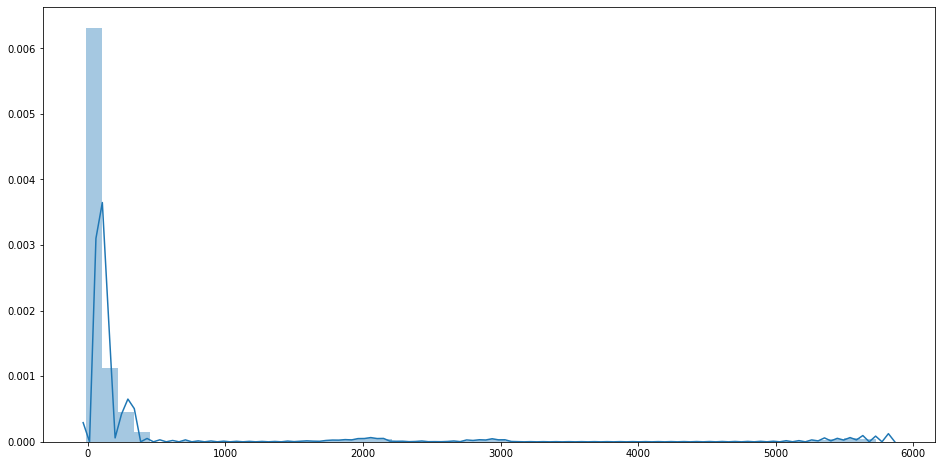

In [ ]:
#plotting the displot
plt.figure(figsize=(16,8))
sb.distplot(clean_df);

In [ ]:
#normalization
for i in clean_df.keys():
  min = clean_df[i].min()
  max = clean_df[i].max()
  for j in range(0,len(clean_df[i])):
    clean_df[i][j] = (clean_df[i][j] - min) / (max-min)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
clean_df = clean_df.sort_index(ascending=True, axis=0)
clean_df

,BFP_SEAL_WATER_FLOW,BFP_SUCT_HDR_PRESS________,AUX_CDSR_2B_PRESS_________,BFP_SUCTION_HDR_TEMP______,BFPT_B_VALVE_DEMAND_HP_STO,BFPT_B_VALVE_DEMAND_LP_STO,BFPT_B_CALC_VALVE_DEMAND__,2B_TDBFP_RECIRC_VLV_DMD___,BFP_2B_DISCHARGE_FLOW_____,BFP_2B_IBRD_SEAL_INJ_FLOW_,BFP_2B_OBRD_SEAL_INJ_FLOW_,2B_TDBFP_DISCHARGE_FLOW___,BFP_2B_BAL_DRUM_FLOW______,2B_TDBFP_RECIRC_VLV_POS___,BFP_DSCH_HDR_PRESS________,BFP_2B_LUBE_OIL_PRESS_____,BFPT_2B_FIRST_STAGE_PRESS_,2B_TDBFP_RECIRC_FLOW______,BFPT_B_LP_SPEED_INPUT__1__,BFPT_B_LP_SPEED_INPUT__2__,BFP_DISCHARGE_HEADER_TEMP_,BFP_2B_THRUST_BRG_TEMP____,BFP_2B_IN_BRG_TEMP________,BFP_2B_OUT_BRG_TEMP_______,BFPT_2B_BRG_1_DRAIN_TEMP__,BFPT_2B_BRG_2_DRAIN_TEMP__,BFPT_2B_THRUST_BRG_DRAIN__,BFP_2B_BARREL_TOP_IBRD_TEM,BFP_2B_BARREL_BOT_IBRD_TEM,BFP_2B_BARREL_TOP_OBRD_TEM,BFP_2B_BARREL_BOT_OBRD_TEM,BFPT_2B_IN_BRG_MTL_TEMP___,BFP_2B_IBRD_SEAL_INJ_DRN_T,BFP_2B_OBRD_SEAL_INJ_DRN_T,2B_BFPT_ROTOR_VIB_OBRG____,2B_BFPT_ROTOR_VIB_IBRB____,BFPT_2B_RAD_SHAFT_VIB_OB_B,BFPT_2B_RAD_SHAFT_VIB_IB_B,BFP_2B_AXIAL_SHAFT_VIB____,BFPT_2B_THRUST_BRG_WEAR___,BFP_2B_RAD_SHAFT_VIB_OB_BR,BFP_2B_RAD_SHAFT_VIB_IB_BR,BFPT_2B_AXIAL_SHAFT_VIB___,MAIN_STEAM_FLOW_TO_BFPS___,EXT_STM_FLOW_TO_BFP_2B____,CW_FRM_AUX_CDSR_2B________,CW_TO_AUX_CDS_2B
1998-05-01 00:00:00,0.199306,0.512470,0.949123,0.058564,0.000333,0.0,0.0,1.0000,0.000000,0.697881,0.470604,0.000000,0.000000,0.999702,0.963654,NaN,0.012891,NaN,0.000000,0.000000,0.006479,NaN,0.000527,0.295082,0.004924,0.309729,0.006341,0.000247,0.000225,0.000352,0.000327,0.008136,0.006974,0.006130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,0.044502,0.0004
1998-05-01 00:05:00,0.199306,0.512470,0.949123,0.058564,0.000333,0.0,0.0,1.0000,0.000000,0.697881,0.470604,0.000000,0.000000,0.999702,0.963654,NaN,0.012891,NaN,0.000000,0.000000,0.006479,NaN,0.000527,0.295082,0.004924,0.309729,0.006239,0.000206,0.000225,0.000352,0.000327,0.008136,0.006974,0.006130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,0.044502,0.0004
1998-05-01 00:10:00,0.199306,0.512470,0.949123,0.058564,0.000333,0.0,0.0,1.0000,0.000000,0.697881,0.470604,0.000000,0.000000,0.999702,0.963654,NaN,0.012891,NaN,0.000000,0.000000,0.006455,NaN,0.000527,0.295082,0.004924,0.309729,0.006239,0.000206,0.000225,0.000352,0.000327,0.008136,0.006974,0.006130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,0.044502,0.0004
1998-05-01 00:15:00,0.199306,0.512470,0.949123,0.058564,0.000333,0.0,0.0,1.0000,0.000000,0.697881,0.470604,0.000000,0.000000,0.999702,0.963654,NaN,0.012891,NaN,0.000000,0.000000,0.006455,NaN,0.000527,0.295082,0.004924,0.309729,0.006239,0.000206,0.000225,0.000352,0.000327,0.008136,0.006974,0.006130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,0.044502,0.0004
1998-05-01 00:20:00,0.199167,0.512470,0.949123,0.058564,0.000333,0.0,0.0,1.0000,0.000000,0.697881,0.470604,0.000000,0.000000,0.999702,0.963654,NaN,0.012891,NaN,0.000000,0.000000,0.006455,NaN,0.000527,0.295082,0.004924,0.309729,0.006239,0.000206,0.000225,0.000352,0.000327,0.008136,0.006974,0.006130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,0.044502,0.0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998-06-13 22:40:00,0.535556,0.852912,0.953592,0.927509,0.000000,0.0,0.0,1.0000,0.065113,0.206767,0.159273,0.052046,0.040576,0.999107,0.874480,0.002676,0.012891,0.099982,0.000000,0.000000,0.617226,0.599096,0.904956,0.747153,0.804630,0.391943,0.801473,0.862451,0.764920,0.926299,0.877899,0.539689,0.684848,0.692738,0.001302,0.001393,NaN,NaN,0.007042,0.746112,0.025773,0.009259,NaN,0.3292,0.0,0.441348,0.9080
1998-06-13 22:45:00,0.535556,0.802806,0.953592,0.927365,0.000000,0.0,0.0,1.0000,0.065121,0.206767,0.159006,0.052046,0.040576,0.999107,0.874269,0.002676,0.012891,0.100411,0.000000,0.000000,0.617107,0.599096,0.904429,0.747153,0.804630,0.391437,0.801473,0.861998,0.765911,0.924979,0.877572,0.539689,0.684190,0.692738,0.001302,0.001393,NaN,Na

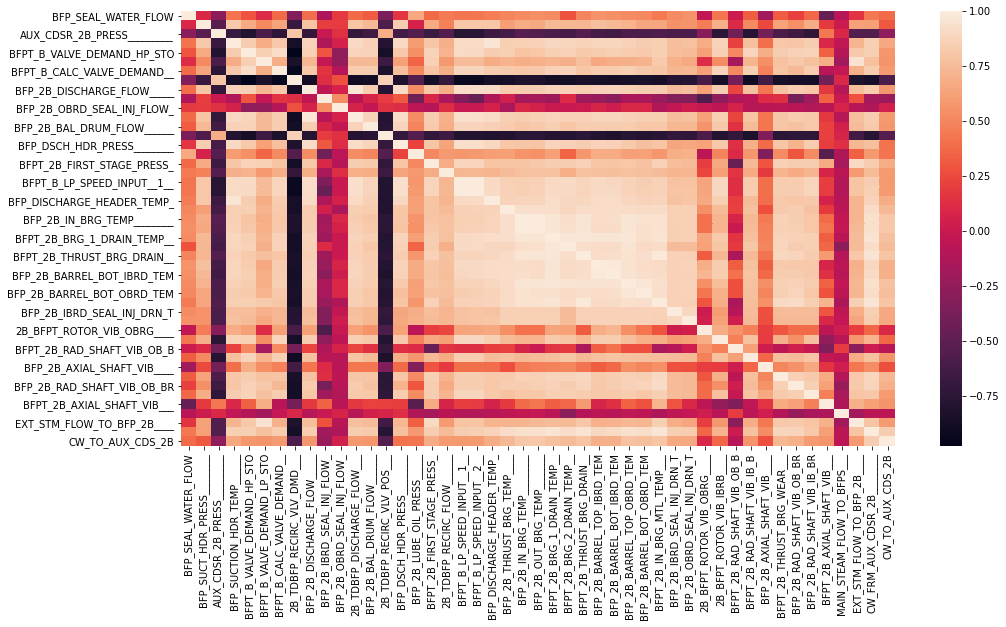

In [ ]:
#plotting the heatmap
plt.figure(figsize=(16,8))
correlation  = clean_df.corr(method = "spearman")
sns.heatmap(correlation)

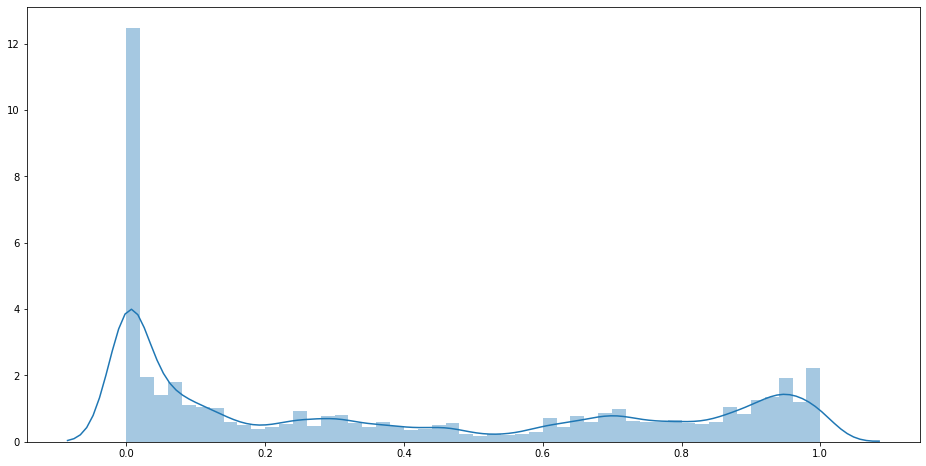

In [ ]:
#plotting the displot after normalization
plt.figure(figsize=(16,8))
sb.distplot(clean_df);

In [ ]:
clean_df.dropna() 

,BFP_SEAL_WATER_FLOW,BFP_SUCT_HDR_PRESS________,AUX_CDSR_2B_PRESS_________,BFP_SUCTION_HDR_TEMP______,BFPT_B_VALVE_DEMAND_HP_STO,BFPT_B_VALVE_DEMAND_LP_STO,BFPT_B_CALC_VALVE_DEMAND__,2B_TDBFP_RECIRC_VLV_DMD___,BFP_2B_DISCHARGE_FLOW_____,BFP_2B_IBRD_SEAL_INJ_FLOW_,BFP_2B_OBRD_SEAL_INJ_FLOW_,2B_TDBFP_DISCHARGE_FLOW___,BFP_2B_BAL_DRUM_FLOW______,2B_TDBFP_RECIRC_VLV_POS___,BFP_DSCH_HDR_PRESS________,BFP_2B_LUBE_OIL_PRESS_____,BFPT_2B_FIRST_STAGE_PRESS_,2B_TDBFP_RECIRC_FLOW______,BFPT_B_LP_SPEED_INPUT__1__,BFPT_B_LP_SPEED_INPUT__2__,BFP_DISCHARGE_HEADER_TEMP_,BFP_2B_THRUST_BRG_TEMP____,BFP_2B_IN_BRG_TEMP________,BFP_2B_OUT_BRG_TEMP_______,BFPT_2B_BRG_1_DRAIN_TEMP__,BFPT_2B_BRG_2_DRAIN_TEMP__,BFPT_2B_THRUST_BRG_DRAIN__,BFP_2B_BARREL_TOP_IBRD_TEM,BFP_2B_BARREL_BOT_IBRD_TEM,BFP_2B_BARREL_TOP_OBRD_TEM,BFP_2B_BARREL_BOT_OBRD_TEM,BFPT_2B_IN_BRG_MTL_TEMP___,BFP_2B_IBRD_SEAL_INJ_DRN_T,BFP_2B_OBRD_SEAL_INJ_DRN_T,2B_BFPT_ROTOR_VIB_OBRG____,2B_BFPT_ROTOR_VIB_IBRB____,BFPT_2B_RAD_SHAFT_VIB_OB_B,BFPT_2B_RAD_SHAFT_VIB_IB_B,BFP_2B_AXIAL_SHAFT_VIB____,BFPT_2B_THRUST_BRG_WEAR___,BFP_2B_RAD_SHAFT_VIB_OB_BR,BFP_2B_RAD_SHAFT_VIB_IB_BR,BFPT_2B_AXIAL_SHAFT_VIB___,MAIN_STEAM_FLOW_TO_BFPS___,EXT_STM_FLOW_TO_BFP_2B____,CW_FRM_AUX_CDSR_2B________,CW_TO_AUX_CDS_2B
1998-05-23 03:05:00,0.226806,0.376521,0.154692,0.784518,1.0,0.604796,0.4827,0.0,0.399351,0.001367,0.040086,0.339425,0.705899,0.000496,0.783986,0.837793,0.436178,0.031696,0.826023,0.827467,0.530381,0.711372,0.710915,0.610937,0.768489,0.775146,0.762913,0.773988,0.734877,0.718397,0.668735,0.859706,0.727482,0.686405,0.131510,0.344011,0.096482,0.756757,0.243662,0.465397,0.324742,0.263889,0.306306,0.844419,0.446663,0.590192,0.6680
1998-06-08 08:05:00,0.639306,0.534443,0.962530,0.903491,0.0,0.000000,0.0000,1.0,0.046698,0.146617,0.134153,0.043849,0.003165,0.999107,0.842386,0.963545,0.000140,0.083223,0.003289,0.001242,0.607365,0.295459,0.533483,0.518271,0.425833,0.416899,0.374143,0.914335,0.898743,0.937211,0.910512,0.392302,0.690901,0.677984,0.010417,0.057103,0.002010,0.280098,0.019718,0.513219,0.139175,0.101852,0.000000,0.000000,0.000000,0.239793,0.4592
1998-06-08 08:10:00,0.638333,0.537485,0.961843,0.893724,0.0,0.000000,0.0000,1.0,0.046611,0.153794,0.135489,0.045103,0.004604,0.999107,0.832324,0.964214,0.000280,0.046168,0.003254,0.001228,0.604983,0.285261,0.514237,0.508384,0.405091,0.379909,0.366881,0.908986,0.891852,0.931623,0.904073,0.372379,0.690374,0.677311,0.010417,0.066852,0.002010,0.115479,0.019718,0.400078,0.128866,0.101852,0.000000,0.000000,0.000000,0.238712,0.4580
1998-06-08 08:15:00,0.637361,0.547483,0.961499,0.883957,0.0,0.000000,0.0000,1.0,0.046523,0.148325,0.136558,0.038576,0.005755,0.999107,0.825763,0.964883,0.000420,0.006968,0.003218,0.001214,0.600457,0.275159,0.498154,0.500125,0.393044,0.371295,0.359620,0.903678,0.885005,0.926035,0.895862,0.352456,0.689782,0.676704,0.010417,0.051532,0.002010,0.169533,0.019718,0.480171,0.113402,0.097222,0.000000,0.000000,0.000000,0.238928,0.4568
1998-06-08 08:20:00,0.636528,0.560447,0.961155,0.874191,0.0,0.000000,0.0000,1.0,0.046436,0.142515,0.137092,0.038606,0.007194,0.999107,0.839207,0.965886,0.000560,0.017295,0.003184,0.001202,0.593597,0.264961,0.482072,0.491866,0.380997,0.362807,0.352460,0.898371,0.878114,0.920403,0.887697,0.332429,0.689256,0.676031,0.010417,0.091922,0.002010,0.319410,0.019718,0.511664,0.103093,0.097222,0.000000,0.000000,0.000000,0.238928,0.4560
1998-06-08 08:25:00,0.635556,0.573373,0.960468,0.864424,0.0,0.000000,0.0000,1.0,0.046349,0.136705,0.129343,0.038633,0.008633,0.999107,0.830709,0.966555,0.000701,0.023298,0.003148,0.001189,0.586737,0.254762,0.465990,0.483607,0.368950,0.354193,0.345505,0.893063,0.871222,0.914815,0.879485,0.318661,0.688730,0.675424,0.010417,0.013928,0.002010,0.203931,0.019718,0.372473,0.092784,0.092593,0.000000,0.000000,0.000000,0.238928,0.4564
1998-06-08 08:30:00,0.634583,0.586337,0.960124,0.854657,0.0,0.000000,0.0000,1.0,0.046262,0.130895,0.121593,0.038659,0.009784,0.999107,0.822208,0.967224,0.000841,0.037949,0.0

In [ ]:
#preparing features
stepwise_model = []
j = 0
for i in clean_df.keys():
  features = i
  print("...."+features+"....")

....BFP_SEAL_WATER_FLOW....
....BFP_SUCT_HDR_PRESS________....
....AUX_CDSR_2B_PRESS_________....
....BFP_SUCTION_HDR_TEMP______....
....BFPT_B_VALVE_DEMAND_HP_STO....
....BFPT_B_VALVE_DEMAND_LP_STO....
....BFPT_B_CALC_VALVE_DEMAND__....
....2B_TDBFP_RECIRC_VLV_DMD___....
....BFP_2B_DISCHARGE_FLOW_____....
....BFP_2B_IBRD_SEAL_INJ_FLOW_....
....BFP_2B_OBRD_SEAL_INJ_FLOW_....
....2B_TDBFP_DISCHARGE_FLOW___....
....BFP_2B_BAL_DRUM_FLOW______....
....2B_TDBFP_RECIRC_VLV_POS___....
....BFP_DSCH_HDR_PRESS________....
....BFP_2B_LUBE_OIL_PRESS_____....
....BFPT_2B_FIRST_STAGE_PRESS_....
....2B_TDBFP_RECIRC_FLOW______....
....BFPT_B_LP_SPEED_INPUT__1__....
....BFPT_B_LP_SPEED_INPUT__2__....
....BFP_DISCHARGE_HEADER_TEMP_....
....BFP_2B_THRUST_BRG_TEMP____....
....BFP_2B_IN_BRG_TEMP________....
....BFP_2B_OUT_BRG_TEMP_______....
....BFPT_2B_BRG_1_DRAIN_TEMP__....
....BFPT_2B_BRG_2_DRAIN_TEMP__....
....BFPT_2B_THRUST_BRG_DRAIN__....
....BFP_2B_BARREL_TOP_IBRD_TEM....
....BFP_2B_BARREL_BOT_IBRD_

In [ ]:
temp1 = pd.DataFrame()
sample1 = clean_df[features]
sample1 = np.array(sample1 , dtype='float32')
temp1[features]  = sample1
temp1.index = clean_df.index
len(temp1)

12661

In [ ]:
temp1.dropna(inplace=True)
print("lenghth after cleaning " , len(temp1))

lenghth after cleaning  12649


In [ ]:
 #splitting data set in training and validation
 lim = int(len(temp1)*0.8)
 training_data = temp1[features][:lim]
 validation_data = temp1[features][lim:]

In [ ]:
print("length of training data ",len(training_data))
print("length of validation data ",len(validation_data))

length of training data  10119
length of validation data  2530


In [ ]:
x_train = []
y_train = []

In [ ]:
for i in range(50,len(training_data)):
    x_train.append(training_data[i-50:i])
    y_train.append(training_data[i])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1] ,1))
print("shape of training data : " , x_train.shape)
print("shape of dependant variable  :" , y_train.shape)

shape of training data :  (10069, 50, 1)
shape of dependant variable  : (10069,)


In [ ]:
#creating the model
features = Sequential()
features.add(LSTM(units=50, return_sequences=True, input_shape= x_train[1].shape))
features.add(LSTM(units=50))
features.add(Dense(1))
features.compile(loss='mean_squared_error', optimizer='adam')
features.fit(x_train, y_train, epochs=1, batch_size=1)
  

Epoch 1/1
10069/10069 [==============================] - 341s 34ms/step - loss: 4.0077e-04


In [ ]:
x_test , y_test = [] , []

In [ ]:

for i in range(50,len(validation_data)):
   x_test.append(validation_data[i-50:i])
   y_test.append(validation_data[i])
x_test = np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
print("shape of testing data : " , x_test.shape)

shape of testing data :  (2480, 50, 1)


In [ ]:
prediction = features.predict(x_test)

In [ ]:
#calculating mean_sqaure_error
print("mean_squared_error " , mean_squared_error(y_test , prediction))

mean_squared_error  3.88406e-06


In [ ]:
features.fit(x_train,y_train,nb_epoch=7,verbose=2)


Epoch 1/7


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


 - 17s - loss: 8.7783e-06
Epoch 2/7
 - 18s - loss: 7.9786e-06
Epoch 3/7
 - 17s - loss: 7.6805e-06
Epoch 4/7
 - 17s - loss: 7.9440e-06
Epoch 5/7
 - 17s - loss: 7.6524e-06
Epoch 6/7
 - 17s - loss: 7.9063e-06
Epoch 7/7
 - 17s - loss: 7.8309e-06


In [ ]:
'''validation_size=12649

x_validate=x_test[validation_size:]
y_validate=y_test[validation_size:]
x_test=x_test[:validation_size]
y_test=y_test[:validation_size]
score,acc=features.evaluate(x_test,y_test,verbose=2)
print("acc %.2f"%(acc))'''

'validation_size=12649\n\nx_validate=x_test[validation_size:]\ny_validate=y_test[validation_size:]\nx_test=x_test[:validation_size]\ny_test=y_test[:validation_size]\nscore,acc=features.evaluate(x_test,y_test,verbose=2)\nprint("acc %.2f"%(acc))'

In [ ]:
'''def arraytolist(y_test):
    temp = []
    for i in y_test:
        sample1 = str(i)
        temp.append(sample1.split("'")[1])
    return temp
def accuracy_score(new_y_test , prediction):
    count = 0
    for i in range(0,len(new_y_test)):
        if new_y_test[i] == prediction[i]:
            count = count + 1
    acc_score = (count/len(prediction))*100
    return acc_score'''

'def arraytolist(y_test):\n    temp = []\n    for i in y_test:\n        sample1 = str(i)\n        temp.append(sample1.split("\'")[1])\n    return temp\ndef accuracy_score(new_y_test , prediction):\n    count = 0\n    for i in range(0,len(new_y_test)):\n        if new_y_test[i] == prediction[i]:\n            count = count + 1\n    acc_score = (count/len(prediction))*100\n    return acc_score'

In [ ]:
'''#inverse reverse of onehot encoding
new_y_test = y_test
#prediction of model
prediction = features.predict(x_test)'''

'#inverse reverse of onehot encoding\nnew_y_test = y_test\n#prediction of model\nprediction = features.predict(x_test)'

In [ ]:
'''label_prediction = []
#process predicted onehot encoded data into meaning ful inspect
for i in range(0,len(prediction)):
  temp = []
  for i in prediction[i]:
    temp.append(float(i))
  temp = np.array(temp)   
  # inverse transform of prediction to get original output
  prediction_ = temp
  label_prediction.append(prediction_)
#determining accuray score
accuracy = accuracy_score(new_y_test , label_prediction)
print("accuracy score :" , accuracy)'''

'label_prediction = []\n#process predicted onehot encoded data into meaning ful inspect\nfor i in range(0,len(prediction)):\n  temp = []\n  for i in prediction[i]:\n    temp.append(float(i))\n  temp = np.array(temp)   \n  # inverse transform of prediction to get original output\n  prediction_ = temp\n  label_prediction.append(prediction_)\n#determining accuray score\naccuracy = accuracy_score(new_y_test , label_prediction)\nprint("accuracy score :" , accuracy)'

In [ ]:
#printing nural structure
features.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [1]:
#score=features.evaluate(x_test,y_test,verbose=0)
#print(f'Test loss:{score[0]}/Test Accurecy:{score[1]}')